<a href="https://colab.research.google.com/github/gabrielfas/Spotify-Playlist-Analysis/blob/master/colab-notebooks/dual_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtendo arquivos do Google Drive

In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

## Fazendo login no Google Cloud Platform

> O login é necessário para obter alguns arquivos que serão utilizados no decorrer do notebook.
Os arquivos estão disponíveis nessa pasta do Google Drive: [diversify-files](https://drive.google.com/drive/folders/1RNg99x6G_Mmh1smc3SrRz-Qk3PCj8Cys)<br/>
Eles serão baixados automaticamente na máquina virtual do google colaborative no código abaixo.



In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
folder_id = '1RNg99x6G_Mmh1smc3SrRz-Qk3PCj8Cys'
folder = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)})

file_list = folder.GetList()

for file in file_list:
    file.GetContentFile(file['title'])
    

## Instalando dependências

> Esse passo pode ser um pouco demorado devido à máquina virtual da google ser iniciada sem nenhum dos pacotes de visualização.

In [5]:
!pip install -r requirements.txt

    100% |████████████████████████████████| 14.7MB 1.5MB/s 
    100% |████████████████████████████████| 12.6MB 796kB/s 
    100% |████████████████████████████████| 12.1MB 2.7MB/s 
    100% |████████████████████████████████| 8.9MB 3.6MB/s 
    100% |████████████████████████████████| 204kB 29.3MB/s 
    100% |████████████████████████████████| 7.4MB 3.8MB/s 
    100% |████████████████████████████████| 952kB 14.4MB/s 
  Running setup.py bdist_wheel for bokeh ... - \ | / - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/ff/28/51/22e8d08e9d5383ee1de981aaa8ff7bc53c7d65022e5101400f
  Running setup.py bdist_wheel for seaborn ... - done
  Stored in directory: /root/.cache/pip/wheels/fc/1c/74/c8f80a532c06a789599b8659b117ec7d7574cac4a06f7dabfe
  Running setup.py bdist_wheel for spotipy ... - done
  Stored in directory: /root/.cache/pip/wheels/76/28/19/a86ca9bb0e32dbd4a4f580870250f5aeef852870578e0427e6
  Running setup.py bdist_wheel for missingno ... -

# Pacotes utilizados

In [0]:
import pandas as pd
import numpy as np
import interfacespfy as isp
import altair as alt
import seaborn as sns
import bokeh as bkh
import missingno as msno
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
# alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
alt.renderers.enable('colab')

RendererRegistry.enable('colab')

## Fazendo login no spotify e baixando musicas salvas

In [10]:
spfy = isp.login_user('belzedu')
musics = isp.get_favorite_songs(spfy)



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?scope=playlist-modify-private+user-library-read&redirect_uri=http%3A%2F%2Flocalhost%2F&response_type=code&client_id=5d6d117598a94245a84a726981fa6e3b in your browser


Enter the URL you were redirected to: http://localhost/?code=AQB09UacgLSqDNhqPAKgQWp2KtH76-QaxrGVLD56FFgT3uL3SGTwD0TdxdHXlzQDkUHJguzwA2mC7EMmpyT-XzUVF4fbjrdvA0f57RNPAxOLaMaBtMBT-kEGCK7WvGPN7QFiLSlrOSR2fgrBeArv_KWh8tQyxoGHujr9t1w3bvAR6JIi9XCSNDAF6k3NmkIjTQUqkjgS3twe9Lw8E-ObY3g7X3CnHnjAKAGrQslCQ_0Oudgr6g




In [11]:
pdmusics = pd.DataFrame(musics)
pdmusics.set_index(['id'], inplace=True)
print("Quantidade de musicas baixadas:", pdmusics.shape[0])
pdmusics.head()

('Quantidade de musicas baixadas:', 564)


,album,album_id,artist,artist_id,duration_ms,name,popularity
id,,,,,,,
08JTB5hpXPCVPGJzic8E9e,Beautiful People Will Ruin Your Life (Extended...,7CPPcbdyAhAF1PEWCnm4DY,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,214432,Bee-Sting,43
7v9Ne4758aGFfFc5avh89h,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,191293,Let's Dance To Joy Division,65
4w9TBRGhvbhiLQB8jVCusl,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,219481,Cheetah Tongue,63
11IJA30efHAJLO3qroPh5L,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,207679,Turn,63
7GvkOFkNsM6Exnkyqeajqm,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,210560,Moving To New York,64


In [0]:
saved_songs_feat = isp.get_favorite_songs(spfy, features=True)
saved_songs_data = isp.get_favorite_songs(spfy)

## Descrição das colunas

- **acousticness**: Valor de 0 a 1 que indica se há som de audiência na música. Um valor de 1 indica maior certeza da presença de público na gravação e vice-versa.
- **danceability**: Valor de 0 a 1 que indica se a música é favorável para dançar de acordo com características musicais como setabilidade ritimica.
- Adicionar outras

In [13]:
df_ssongs = pd.DataFrame(saved_songs_feat)
print("Quantidade de musicas salvas:", df_ssongs.shape[0])
df_ssongs.head()

('Quantidade de musicas salvas:', 564)


,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.045700,0.650,0.866,08JTB5hpXPCVPGJzic8E9e,0.000000,11,0.0682,-3.713,1,0.0343,115.001,0.717
1,0.001250,0.397,0.839,7v9Ne4758aGFfFc5avh89h,0.000000,4,0.5760,-6.674,1,0.1020,116.947,0.764
2,0.042600,0.533,0.967,4w9TBRGhvbhiLQB8jVCusl,0.000432,2,0.1320,-3.066,1,0.0570,95.008,0.603
3,0.007430,0.531,0.847,11IJA30efHAJLO3qroPh5L,0.000000,1,0.0916,-3.907,1,0.0529,105.030,0.380
4,0.000029,0.252,0.886,7GvkOFkNsM6Exnkyqeajqm,0.000005,9,0.2560,-4.678,0,0.0714,161.939,0.498


## Unindo os dados em um unico dataframe

In [14]:
df_ssongsdata = pd.DataFrame(saved_songs_data)
edu_songs = df_ssongsdata.merge(df_ssongs, how='left', on='id')
print("Exemplo de amostra apos juntar tabelas:")
edu_songs['user'] = 'edujtm'
edu_songs.iloc[1].T

Exemplo de amostra apos juntar tabelas:


album               Proudly Present....A Guide To Love, Loss & Des...
album_id                                       75l5Bqvc0BH45UhJrS04Xj
artist                                                    The Wombats
artist_id                                      0Ya43ZKWHTKkAbkoJJkwIB
duration_ms                                                    191293
id                                             7v9Ne4758aGFfFc5avh89h
name                                      Let's Dance To Joy Division
popularity                                                         65
acousticness                                                  0.00125
danceability                                                    0.397
energy                                                          0.839
instrumentalness                                                    0
key                                                                 4
liveness                                                        0.576
loudness            

## Lendo as playlists do Gabriel e Renato

In [31]:
#gabriel_mfeat = isp.get_user_playlists(spfy, '12144777067', features=True)
#gabriel_mdata = isp.get_user_playlists(spfy, '12144777067')alt
gabriel_songs = pd.read_csv('gabriel_songs.csv')
gabriel_songs.sample(frac=1)
print("Quantidade de musicas:", gabriel_songs.shape[0])
gabriel_songs['user'] = 'gfeli'
gabriel_songs.iloc[1].T

#gabriel_mfeat = isp.get_user_playlists(spfy, '12144777067', features=True)
#gabriel_mdata = isp.get_user_playlists(spfy, '12144777067')alt
renato_songs = pd.read_csv('renato_playlists (3).csv')
print("Quantidade de musicas:", renato_songs.shape[0])
renato_songs['user'] = 'renatochacon'
renato_songs.iloc[1].T

('Quantidade de musicas:', 4600)
('Quantidade de musicas:', 425)


Unnamed: 0                                   1
acousticness                              0.16
danceability                             0.388
energy                                   0.529
id                      5NQYyej46WQkgCbnzGD21W
instrumentalness                        0.0681
key                                          7
liveness                                 0.108
loudness                               -10.533
mode                                         1
speechiness                             0.0436
tempo                                  150.721
valence                                  0.332
album                 The Beatles (Remastered)
album_id                1klALx0u4AavZNEvC4LrTL
artist                             The Beatles
artist_id               3WrFJ7ztbogyGnTHbHJFl2
duration_ms                             235773
name                Dear Prudence - Remastered
popularity                                  61
user                              renatochacon
Name: 1, dtyp

In [24]:
## Unindo os dataframes de ambos os usuários
all_songs = edu_songs.append(gabriel_songs[:564]).append(renato_songs)
all_songs.shape[0]

1553

In [41]:
all_songs.drop(['Unnamed: 0'], axis=1, inplace=True)
all_songs.columns

Index([u'acousticness', u'album', u'album_id', u'artist', u'artist_id',
       u'danceability', u'duration_ms', u'energy', u'id', u'instrumentalness',
       u'key', u'liveness', u'loudness', u'mode', u'name', u'popularity',
       u'speechiness', u'tempo', u'user', u'valence'],
      dtype='object')

In [51]:
#all_songs.describe().T
#all_songs.info()
#all_songs.head()
all_songs.tail()

,acousticness,album,album_id,artist,artist_id,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,user,valence
420,0.9120,Skeleton Tree,34xaLN7rDecGEK5UGIVbeJ,Nick Cave & The Bad Seeds,4UXJsSlnKd7ltsrHebV79Q,0.303,358026,0.464,2MWyl7mj5wM75B3t3D5z4E,0.00859,9,0.0979,-10.212,1,I Need You,45,0.0347,114.379,renatochacon,0.0965
421,0.9620,Skeleton Tree,34xaLN7rDecGEK5UGIVbeJ,Nick Cave & The Bad Seeds,4UXJsSlnKd7ltsrHebV79Q,0.216,336373,0.207,6Os4eDkEJjmLa7LJlQYNCl,0.31600,5,0.0985,-14.341,1,Distant Sky,43,0.0333,91.551,renatochacon,0.0411
422,0.9530,Skeleton Tree,34xaLN7rDecGEK5UGIVbeJ,Nick Cave & The Bad Seeds,4UXJsSlnKd7ltsrHebV79Q,0.455,241533,0.315,3iC4tcs4MfcTBXMV2ptj1M,0.00409,3,0.0953,-12.931,1,Skeleton Tree,45,0.0267,62.461,renatochacon,0.1460
423,0.5770,The Search for Everything - Wave One,5GkyQHN2jO9L05VV0gBnGH,John Mayer,0hEurMDQu99nJRq8pTxO14,0.848,261933,0.465,1CdEcheLJU6SgxnbFEj2WX,0.05430,1,0.1010,-9.029,0,Moving On and Getting Over,54,0.0524,94.020,renatochacon,0.6210
424,0.0232,Music for the Masses,5Yyx661Ksxl2pmRUuGLzw3,Depeche Mode,762310PdDnwsDxAQxzQkfX,0.532,253400,0.785,1jw2wJAxzDOpLOxQO9pnOl,0.67500,11,0.1330,-11.578,1,Nothing,0,0.0269,107.752,renatochacon,0.8860


## Rápida análise integridade dos dados após unir as tabelas

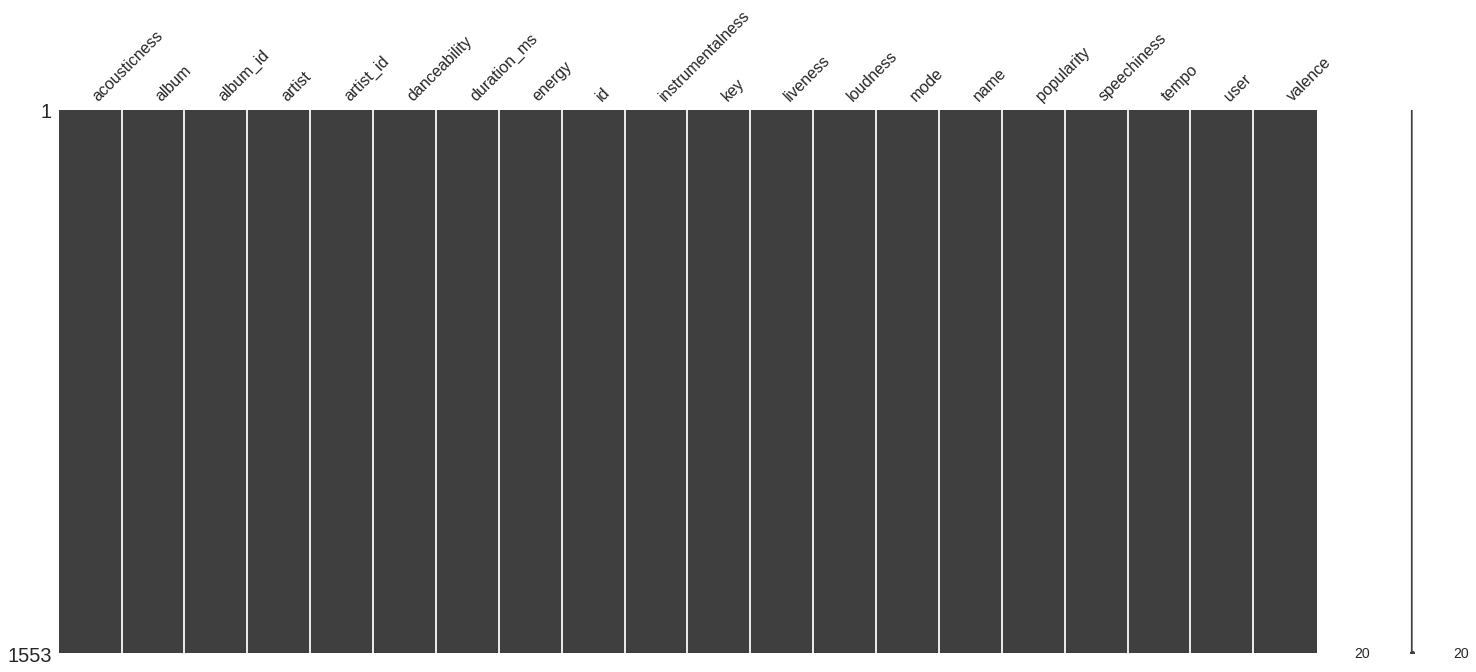

In [48]:
_ = msno.matrix(all_songs)

# Buscando similaridades e diferenças significativas entre os dados

> O objetivo desta análise é encontrar possíveis diferenças entre os dados de ambos os dataframes que podem representar diferenças entre os
> gostos musicais de cada usuário. Tentaremos observar isso graficamente utilizando as bibliotecas do python.

In [0]:
def plot_similarities(data, variables):
    root = int(np.ceil(np.sqrt(len(variables))))
    fig, axis = plt.subplots(nrows=root, ncols=root, figsize=(15, 15))
    
    numeric_categories = ["0.0 - 0.2",
                           "0.2 - 0.4",
                           "0.4 - 0.6",
                           "0.6 - 0.8",
                           "0.8 - 1.0",
                           ]
    fig.suptitle('Comparando distribuicoes para as caracteristicas das musicas')
    for idx, column in enumerate(variables):
        i, j = idx % root, idx // root
        ax = axis[j][i]
        
        grouped = data.groupby('user')[[column, 'user']]
        
        for user, group in grouped:
            sns.distplot(group[column], ax=ax, label=user)
        ax.legend()
    plt.show()

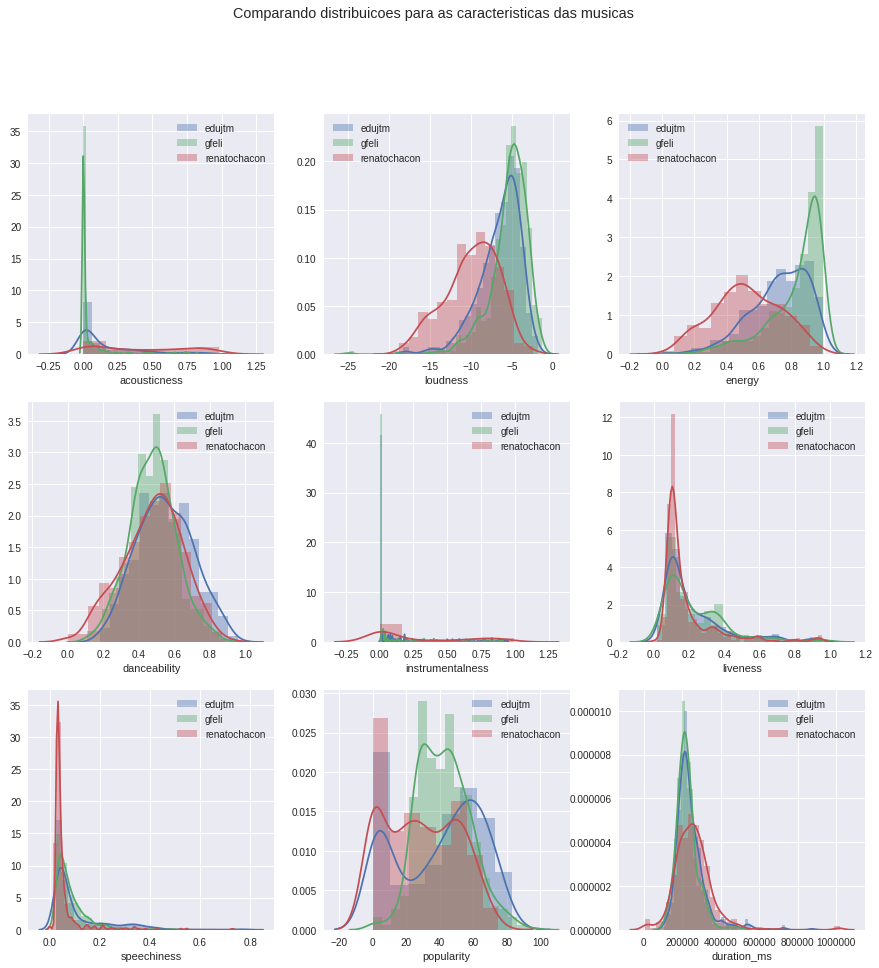

In [53]:
warnings.filterwarnings('ignore')
variables = ['acousticness', 'loudness', 'energy', 'danceability', 'instrumentalness', 'liveness', 'speechiness', 'popularity', 'duration_ms']
plot_similarities(all_songs, variables)

In [54]:
interval = alt.selection_interval()

data = alt.Chart(all_songs).mark_point().encode(
    x='energy',
    y='loudness',
    tooltip=['name', 'popularity'],
    color=alt.condition(interval, 'user:N', alt.value('lightgray')),
).properties(
    selection=interval
)

popularity = alt.Chart(all_songs).mark_bar(opacity=0.5).encode(
    x=alt.X('popularity', bin=True),
    y='count()',
    color='user',
).transform_filter(
    interval
)

data | popularity

HConcatChart({
  hconcat: [Chart({
    data:      acousticness                                              album  \
    0        0.045700  Beautiful People Will Ruin Your Life (Extended...   
    1        0.001250  Proudly Present....A Guide To Love, Loss & Des...   
    2        0.042600               Beautiful People Will Ruin Your Life   
    3        0.007430               Beautiful People Will Ruin Your Life   
    4        0.000029  Proudly Present....A Guide To Love, Loss & Des...   
    5        0.005790                                         Glitterbug   
    6        0.001260                                   Shoot The Runner   
    7        0.294000                                           Currents   
    8        0.358000                                           Currents   
    9        0.069600                                           Currents   
    10       0.317000                                               Ares   
    11       0.454000                                         effloresce   
    12       0.181000               Big Boi Presents... Got Purp? Vol. 2   
    13       0.131000                                           Diaspora   
    14       0.852000                                             Jungle   
    15       0.710000                                             Jungle   
    16       0.236000                                             Jungle   
    17       0.142000                                             Jungle   
    18       0.217000                                           For Ever   
    19       0.986000                                           For Ever   
    20       0.106000                                           For Ever   
    21       0.011900                                           For Ever   
    22       0.680000                                           For Ever   
    23       0.362000                                           For Ever   
    24       0.465000                                           For Ever   
    25       0.431000                                           For Ever   
    26       0.198000                                           For Ever   
    27       0.889000                                           For Ever   
    28       0.244000                                           For Ever   
    29       0.073300                                           For Ever   
    ..            ...                                                ...   
    395      0.151000                          The Search for Everything   
    396      0.623000                          The Search for Everything   
    397      0.386000                          The Search for Everything   
    398      0.587000                          The Search for Everything   
    399      0.897000                          The Search for Everything   
    400      0.591000                          The Search for Everything   
    401      0.730000                          The Search for Everything   
    402      0.489000                          The Search for Everything   
    403      0.624000                          The Search for Everything   
    404      0.983000                          The Search for Everything   
    405      0.048500                                             FORGET   
    406      0.001200                                             FORGET   
    407      0.001660                                             FORGET   
    408      0.352000                                             FORGET   
    409      0.005390                                             FORGET   
    410      0.064700                                             FORGET   
    411      0.005700                                             FORGET   
    412      0.002460                                             FORGET   
    413      0.660000                                             FORGET   
    414      0.068700                                             FORGET   
    415